# Kinshuk Jagdev 


# Problem Statement

TensorFlow is an end-to-end open-source platform for machine learning. It has a comprehensive, flexible ecosystem of tools, libraries and community resources that lets researchers push the state-of-the-art in ML and developers easily build and deploy ML-powered applications.

The authenticity of Information has become a longstanding issue affecting businesses and society, both for printed and digital media. On social networks, the reach and effects of information spread occur at such a fast pace and so amplified that distorted, inaccurate, or false information acquires a tremendous potential to cause real-world impacts, within minutes, for millions of users. Recently, several public concerns about this problem and some approaches to mitigate the problem were expressed.

## Task

You are required to develop a model using RNN which should correctly classify the news from the dataset as fake or true news.

## Data Used
For this problem, you will use the Fake and Real News Dataset, which is available on Kaggle.


# 1. Importing the libraries

In [ ]:
import tensorflow as tf
import random
import numpy as np
import pandas as pd
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt
import io

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from tensorflow.keras import backend as K 
K.clear_session()

# 2. Data Loading and Cleaning 

#### Loading Kaggle Dataset

In [ ]:
# entering file path in read_csv function to get data
df = pd.read_csv('.\FakeNewsData.csv')

#taking care of the null values
df = df.fillna(' ')
df.count()

id        20800
title     20800
author    20800
text      20800
label     20800
dtype: int64

# Preprocessing the Text Data
The first step in preparing data for most natural language processing tasks is preprocessing the text data. Tasks are:

* Removing unwanted characters such as punctuation, HTML tags, and emoticons using regular expressions.
* Removing stop words (words that are extremely common in the English language and are generally not necessary for text classification purposes).
* Lemmatization, which is the process of reducing a word to its lemma or dictionary form. For example, the word run is the lemma for the words runs, ran, and running.

## The Tokenizer
A tokenizer is used to split each news article into a vector of sequential words, which is later converted to a vector of integers by assigning a unique integer index to each word. 

In [ ]:
# Using tokenizer to perform tokenization

tokenizer = Tokenizer()

#fitting our data to tokenizer
tokenizer.fit_on_texts(df['text'])

word_index = tokenizer.word_index

#vocabulary size setting
vocab_size=len(word_index)
print(vocab_size)

# Padding data
sequences = tokenizer.texts_to_sequences(df['text'])
padded = pad_sequences(sequences, maxlen=500, padding='post', truncating='post')

238051


### 3. Splitting the Training and Testing data

Here, we will use 80% data for testing purpose and 20% for training purpose

In [ ]:
#using split variable for data splitting purpose
split = 0.2

#performing the split operation


split_n = int(round(len(padded)*(1-split),0))

#storing the split data parts into the variables
train_data = padded[:split_n]
train_labels = df['label'].values[:split_n]
test_data = padded[split_n:]
test_labels = df['label'].values[split_n:]

### 4. Word Embedding Layers
Word embeddings are learnable vector representations of words that represent the meaning of the words in relation to other words. Deep learning approaches can learn word embeddings from collections of text such that words with similar embedding vectors tend to have similar meanings or represent similar concepts.

In [ ]:
# Import tensor representations for words

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/glove.6B.100d.txt \
    -O /tmp/glove.6B.100d.txt
embeddings_index = {};
with open('/tmp/glove.6B.100d.txt') as f:
    for line in f:
        values = line.split();
        word = values[0];
        coefs = np.asarray(values[1:], dtype='float32');
        embeddings_index[word] = coefs;
print(len(coefs))

embeddings_matrix = np.zeros((vocab_size+1, 100));
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word);
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector;

--2019-12-11 14:01:14--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/glove.6B.100d.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.127.128, 2a00:1450:4013:c05::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.127.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 347116733 (331M) [text/plain]
Saving to: ‘/tmp/glove.6B.100d.txt’

/tmp/glove.6B.100d. 100%[===================>] 331.04M  75.6MB/s    in 4.4s    

2019-12-11 14:01:19 (75.6 MB/s) - ‘/tmp/glove.6B.100d.txt’ saved [347116733/347116733]

100


### 5. Model Building

#### Model Information
The deep learning model designed for this task is a recurrent convolutional neural network model that consists of several different types of sequential operations and layers:
1. A tokenizer is used to transform each article into a vector of indexed words (tokens).
2. A word embedding layer that learns an embedding vector with m dimensions for each unique word and applies this embedding for the first n words in each news article, generating a m x n matrix.
3. 1D convolutional and max-pooling layers.
4. LSTM layers followed by dropout layers.
5. A final fully-connected layer.

In [ ]:
# Build the architecture of the model
     
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size+1, 100, weights=[embeddings_matrix], trainable=False),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.LSTM(20, return_sequences=True),
    tf.keras.layers.LSTM(20),
    tf.keras.layers.Dropout(0.2),  
    tf.keras.layers.Dense(512),
    tf.keras.layers.Dropout(0.3),  
    tf.keras.layers.Dense(256),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

history = model.fit(train_data, train_labels, epochs=5, batch_size=100, validation_data=[test_data, test_labels])

print("Training Complete")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         23805200  
_________________________________________________________________
dropout (Dropout)            (None, None, 100)         0         
_________________________________________________________________
conv1d (Conv1D)              (None, None, 64)          32064     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 64)          0         
_________________________________________________________________
lstm (LSTM)                  (None, None, 20)          6800      
_________________________________________________________________
lstm_1 (LSTM)                (None, 20)                3280      
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0

## Working of Model Representation
Text comes in various formats. The text of Twitter tweets can be really messy. News articles can use a lot of blank lines. The first step in every Natural Language Processing task is to clean the text, by removing blank lines and unnecessary punctuation.
The next step is to transform the words to numbers, because computers can’t read words. There are multiple ways of doing this. The easiest way is to assign numbers for each unique word, and then use that as input for a model. So the sentence “Last summer the singer toured the Westcoast of the USA” would become [1 2 3 4 5 3 6 7 3 8]. As you can see each unique word is assigned a new number. Another more common method is to use pretrained word embeddings. Instead of converting every word in a number, words are converted to a tensor representation. So when a 4-dimensional embedding is used, every (unique) word is converted to a combination of four numbers. Word embedding work so well because the semantics of the words are captured, words with the same meaning have similar tensor values and differences with other word groups are similar as well. The example underneath visualizes this. As you can see the words all get bigger Y values when the word is feminine.

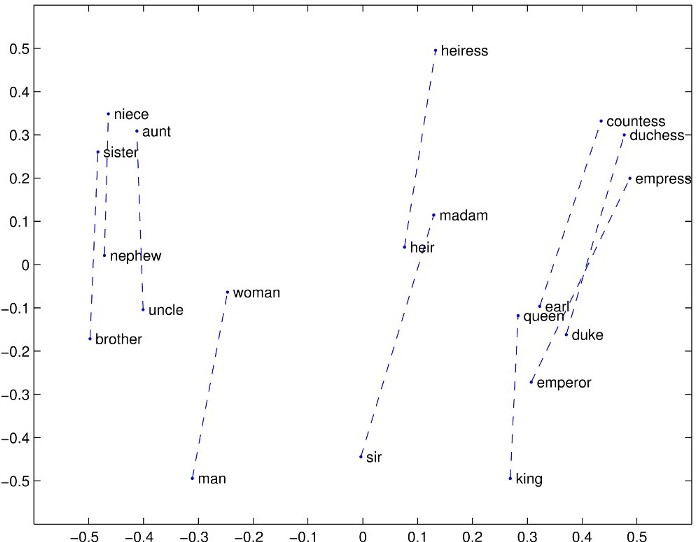

After the words are converted into word embeddings, the words are fed into a neural network. This neural network consists of various layers. The first layer is a convolutional layer. A convolution is a filter that can extract features from the data. In image detection for example, convolutions can be used to detect edges or shapes. In Natural Language Processing convolutions can also improve performance. The example below shows a filter that extracts relation between two words that have one word in between. In each step, the filter is multiplied with the word embedding values. The filter values of 1 times the word embedding values result in the word embedding values, while filter values of 0 result in 0.

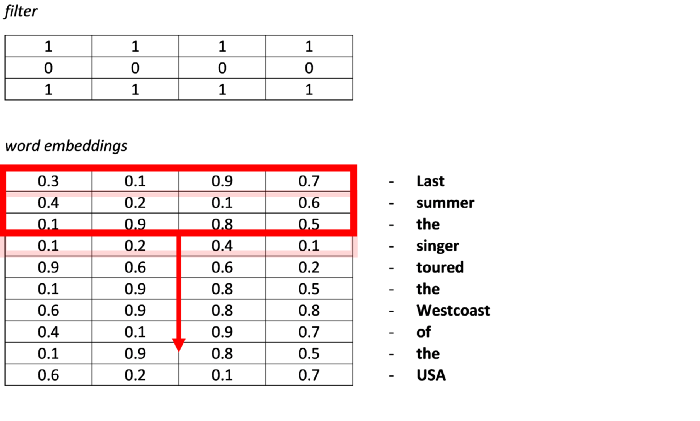

The next layer is a max pooling layer. This layer iterates over the tensors and takes the highest value. In this way the feature space is compressed. This step makes sure important features are kept, while empty space is dropped.

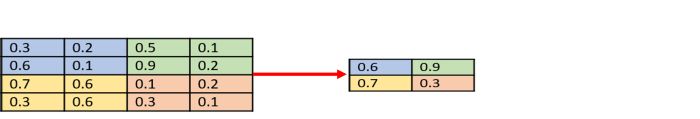

The next layer is a Long Short Term Memory (LSTM) Layer. A common LSTM unit is composed of a cell, an input gate, an output gate and a forget gate. The cell remembers values over arbitrary time intervals and the three gates regulate the flow of information into and out of the cell. More about LSTM layers can be found here.
The last layer before the prediction is made is a fully connected layer. This is a regular neural network layer where all nodes are connected with each other. The overall network architecture looks like this:

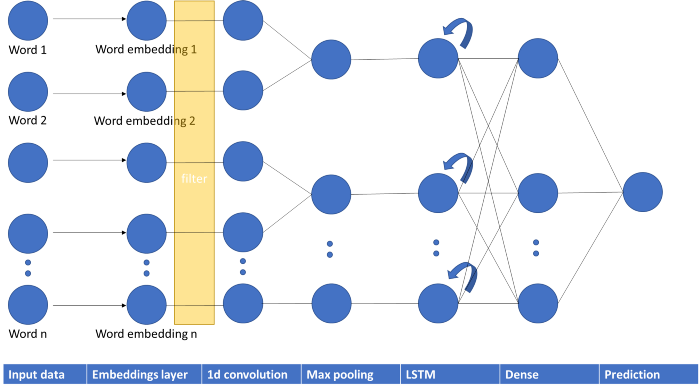

### 6. Model Evalutation

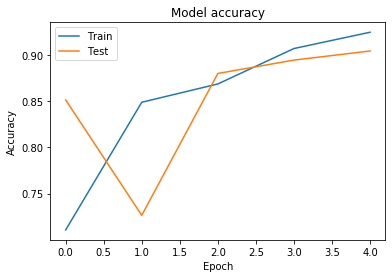

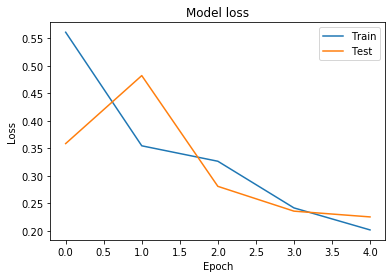

In [ ]:
#performance visualization

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

After Training, the model achieved a validation accuracy of 0.9142, which means that more than 9 out of 10 news articles are correctly classified as reliable or not. After predicting on the submission dataset of Kaggle, this algorithm achieved a score of 0.97.

### 7. Conclusion

**Model Score on Kaggle**: 0.97

We are satisfied with the current performace of our model. Even though it recieved a very high score, we do acknowledge that there are better ways to approach this problem

# Thank You
## Kinshuk Jagdev
## 18BCS6019
## AIML-1